# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [2]:
df = pd.read_csv('data_all.zip')
df.shape


(116322, 785)

In [3]:
df.head()

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Your code here

print(sorted(df.e.unique()))

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0]


In [5]:
data_array = np.array(df)
#data_array[2,1:]


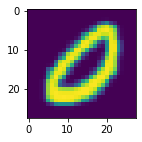

In [6]:

plt.figure(figsize=(2,2))
plt.imshow(data_array[1,1:].reshape(28,28))
plt.show()

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [7]:
# Your code here

df['type'] = ['number' if x<=9
               else 'upper' if 9<x<36
               else 'lower' for x in df['e']]
df['type'].unique()



array(['lower', 'number', 'upper'], dtype=object)

In [8]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split


models = [SVC, GaussianNB, MultinomialNB, DecisionTreeClassifier, LogisticRegression, RandomForestClassifier]    

def model_test(modelos, data, char):
    X = data[data['type'] == char].drop(columns = ['type', 'e'])
    Y = data[data['type'] == char]['e']
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8)
    
    for i in models:
        model = i()
        model.fit(X_train, Y_train)
        train_score = model.score(X_train, Y_train)
        test_score = model.score(X_test, Y_test)
        print('Modelo:', str(i))
        print('Train score', train_score)
        print('Test score', test_score)
        



In [9]:
model_test(models, df, 'upper')

Modelo: <class 'sklearn.svm._classes.SVC'>
Train score 0.9699712872866486
Test score 0.9306109427340884
Modelo: <class 'sklearn.naive_bayes.GaussianNB'>
Train score 0.5217738076248205
Test score 0.5096506619875578
Modelo: <class 'sklearn.naive_bayes.MultinomialNB'>
Train score 0.6959243898548413
Test score 0.6862338490987399
Modelo: <class 'sklearn.tree._classes.DecisionTreeClassifier'>
Train score 1.0
Test score 0.7371191577604084


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Modelo: <class 'sklearn.linear_model._logistic.LogisticRegression'>
Train score 0.8898947200510449
Test score 0.8175147551443611
Modelo: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Train score 1.0
Test score 0.907640772052959


* Try to do the same thing with lowercases.

In [10]:
model_test(models, df, 'lower')

Modelo: <class 'sklearn.svm._classes.SVC'>
Train score 0.9471058345267243
Test score 0.8996674057649667
Modelo: <class 'sklearn.naive_bayes.GaussianNB'>
Train score 0.41294405691319813
Test score 0.3919068736141907
Modelo: <class 'sklearn.naive_bayes.MultinomialNB'>
Train score 0.6460941469949647
Test score 0.6378418329637842
Modelo: <class 'sklearn.tree._classes.DecisionTreeClassifier'>
Train score 1.0
Test score 0.7075018477457502


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Modelo: <class 'sklearn.linear_model._logistic.LogisticRegression'>
Train score 0.8488012195685314
Test score 0.786770140428677
Modelo: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Train score 1.0
Test score 0.8758314855875832


In [ ]:
# Your code here

* Try to do the same thing with numbers.

In [12]:
# Your code here
model_test(models, df, 'number')

Modelo: <class 'sklearn.svm._classes.SVC'>
Train score 0.9918418440022446
Test score 0.9803176795580111
Modelo: <class 'sklearn.naive_bayes.GaussianNB'>
Train score 0.6570337117451548
Test score 0.6513294198895028
Modelo: <class 'sklearn.naive_bayes.MultinomialNB'>
Train score 0.8179306772564423
Test score 0.8093059392265194
Modelo: <class 'sklearn.tree._classes.DecisionTreeClassifier'>
Train score 1.0
Test score 0.8895027624309392


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Modelo: <class 'sklearn.linear_model._logistic.LogisticRegression'>
Train score 0.9485043380670781
Test score 0.9267092541436464
Modelo: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Train score 1.0
Test score 0.9690089779005525
